# Facial Expression Recognition using Convolutional Neural Network

### Download Data

Here we use FER2013 dataset in [Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) in Kaggle. Therefore, let's configure Kaggle API and download the training dataset.

In [ ]:
import os

# Configure kaggle
os.chdir('/root/')
!mkdir -p .kaggle
os.chdir('/root/.kaggle')
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y-o0TVcjehM8SZB3Nt8U3xkyeQu-Nse-' -O kaggle.json > /dev/null 2>&1
!ls /root/.kaggle

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

# Create data folder
os.chdir('/content/')
!rm -rf data
!mkdir data
os.chdir('data')
!pwd

# Download data
!pip install -q kaggle
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

# List the downloaded files to verify the dataset
print("\nFiles downloaded:")
!ls /content/data

# Unzip the downloaded ZIP file
!unzip -o challenges-in-representation-learning-facial-expression-recognition-challenge.zip

# Verify unzipped files
print("\nFiles after unzipping:")
!ls /content/data


kaggle.json
/content/data
 99% 282M/285M [00:14<00:00, 21.0MB/s]
100% 285M/285M [00:14<00:00, 20.2MB/s]

Files downloaded:
challenges-in-representation-learning-facial-expression-recognition-challenge.zip
Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               

Files after unzipping:
challenges-in-representation-learning-facial-expression-recognition-challenge.zip
example_submission.csv
fer2013.tar.gz
icml_face_data.csv
test.csv
train.csv


### Load Data

### Preprocess Data

### Preprocess Data

### Preprocess Data

Next, we need to split the dataset into training set and test set. Here, we choose 20% of the dataset as test set, and the rest of the dataset as train set.

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 48, 48, 1)
x_test = x_test.reshape(len(x_test), 48, 48, 1)

print(x_train.shape)
print(x_test.shape)

(22967, 48, 48, 1)
(5742, 48, 48, 1)


Next, we need to split the dataset into training set and test set. Here, we choose 20% of the dataset as test set, and the rest of the dataset as train set.

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 48, 48, 1)
x_test = x_test.reshape(len(x_test), 48, 48, 1)

print(x_train.shape)
print(x_test.shape)

(22967, 48, 48, 1)
(5742, 48, 48, 1)


The image dataset downloaded from Kaggle is in ".csv" file format. Therefore, we need to load the "train.csv" file, and convert it to numpy array. The training images and labels are saved in "x_train" and "y_train" respectively.

In [ ]:
import csv
import numpy

train_images = []
train_labels = []

categories_count = {}

with open('train.csv') as train:

    # Read train.csv file
    csv_reader = csv.reader(train)
    next(csv_reader)  # Skip the header

    for row in csv_reader:

        # Append image
        pixels_str = row[1]
        pixels_list = [int(i) for i in pixels_str.split(' ')]
        pixels_list = numpy.array(pixels_list, dtype='uint8')
        image = pixels_list.reshape((48, 48))
        train_images.append(image)

        label_str = row[0]

        # Calculate categories count
        count = 0
        if label_str in categories_count:
            count = categories_count[label_str] + 1
        categories_count[label_str] = count

        # Append label
        label = int(label_str)
        train_labels.append(label)

# Create numpy array of train images and labels
x_train = numpy.array(train_images)
y_train = numpy.array(train_labels)

print('x_train shape: {0}'.format(x_train.shape))
print('y_train shape: {0}'.format(y_train.shape))

x_train shape: (28709, 48, 48)
y_train shape: (28709,)


The image dataset provided by Kaggle contains 7 different facial expression categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The distogram of the facial expression categories is displayed as follows.

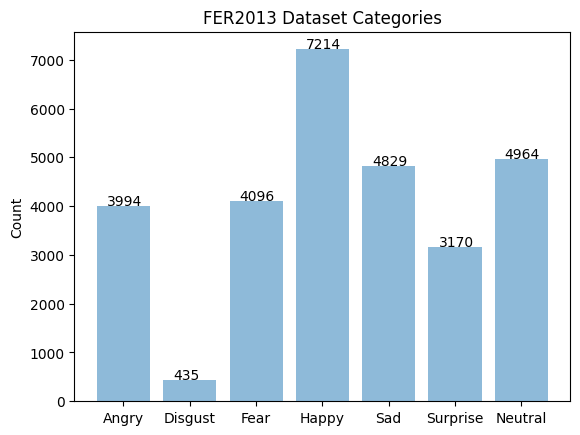

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

categories = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')
y_pos = numpy.arange(len(categories))

counts = []
for label in range(len(categories)):
    label_str = str(label)
    count = categories_count[label_str]
    counts.append(count)
    plt.text(label - 0.25, count + 15, str(count))

# Draw histogram
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('Count')
plt.title('FER2013 Dataset Categories')

plt.show()

Then, let's show one of the images in the dataset. Each image is grey-scale and contains 48 x 48 pixels.

Label is: 0


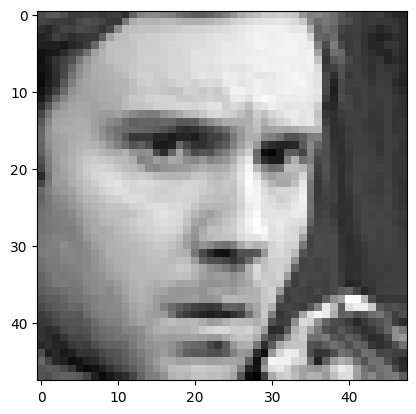

In [ ]:
image = x_train[0]
label = y_train[0]

print('Label is: ' + str(label))
plt.imshow(image, cmap='gray')

### Preprocess Data

Next, we need to split the dataset into training set and test set. Here, we choose 20% of the dataset as test set, and the rest of the dataset as train set.

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 48, 48, 1)
x_test = x_test.reshape(len(x_test), 48, 48, 1)

print(x_train.shape)
print(x_test.shape)

(22967, 48, 48, 1)
(5742, 48, 48, 1)


### Train Model

Next, we need to train the model with the image dataset. Here we use Tensorlow as backend to train the model. Therefore, we need to import all the required packages before the training process.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

print('Tensorflow version: {}'.format(tf.__version__))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import Model, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Tensorflow version: 2.17.1


By referring to VGGNet architecture, we have designed the computer vision model with several stacks of layers. The model will have the following components:
- Convolutional layers: These layers are the building blocks of our architecture, which learns the image feature by computing the dot product between the weights and the small region on the image. Similar to VGGNet architecture, all the convolutional layers are designed with 3 x 3 kernal size, and several filters.
- Activation functions: The activation functions are those functions which are applied to the outputs of the layers in the network. Specifically, we use ReLU (Rectified Linear Unit) activation function to increase the non-linearity of the network. Besides, a Softmax function will be used to compute the probability of each category.
- Pooling layers: These layers will down-sample the image to reduce the spatial data and extract features. In our model, we will use Max Pooling with A 3 x 3 pooling size and a 2 x 2 stride.
- Dense layers: The dense layers are stacked as the fully connected layers of the network, which take in the feature data from the previous convolutional layers and perform decision making.
- Dropout layers: The dropout layers are used to prevent over-fitting when training the model.
- Batch normalization: This technique can be used to speed up learning by normalizing the output of the previous activation layer.

The diagram of the model is displayed as follows.

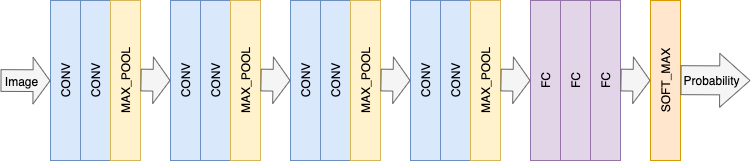

Our model contains 5 stacks of layers. In each of the first 4 stacks of layers, there are 2 convolutional layer followed by 1 pooling layer. Besides, we use batch normalization to speed up training and dropout to prevent over-fitting. Then we have one stack of 3 fully-connected layers, followed by a Softmax activation function, which generates the probability of the facial expression categories. Finally, we compile our model using Adam optimizer with a certain learning rate. Considering that we are dealing with classification issue, we will use `sparse_categorical_crossentropy` as the loss function.